<a href="https://colab.research.google.com/github/clementbowe14/ml-class/blob/main/projects/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification


For this assignment I will be predicting the classes of different images.

The dataset that will be used for this task comes from CIFAR-10.

First lets load the dataset.


In [ ]:
from keras.datasets import cifar10

final_scores = {}
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

Before we start working creating a deep learning model for this there are a few things to do. The features are a matrix of values between 0-255. The values in the matrices  0 to 1 because machine learning models have better performance when the data has a lower variability. Also, the numpy arrays will be reshaped  to 50000, 32, 32, 3.

For our labels we are going to categorically encode them so our model encodes each one of the label classes. 

In [ ]:
from keras.utils import to_categorical

train_X = (train_X.reshape(50000, 32, 32, 3).astype('float32'))/255
test_X = (test_X.reshape(10000, 32, 32, 3).astype('float32'))/255

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

Let now create our first model. The model will contain:
- A flatten layer with input shape (32, 32, 3)
- A dense layer with input size 256, an relu activation function and input shape (32, 32, 3)
- A dense layer with input size 64 and activation function relu
- and a Dense layer with output size 10 and the softmax activation function. 

After we create the model we compile it using categorical crossentropy as the loss function, rmsprop as the optimizer and accuracy as the metrics. 

In [ ]:
from keras import models, layers, optimizers

network = models.Sequential()
network.add(layers.Flatten(input_shape=(32, 32, 3)))
network.add(layers.Dense(256, activation='relu', input_shape=(32,32,3)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(10, activation="softmax"))

network.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

Train the model the using the training features and the test labels for 50 epochs.

In [ ]:
history = network.fit(train_X, train_y, epochs=50,  validation_split=0.2, validation_steps=10)

Epoch 1/20
5000/5000 [==============================] - 48s 9ms/step - loss: 1.9535 - accuracy: 0.2933 - val_loss: 1.8379 - val_accuracy: 0.3419
Epoch 2/20
5000/5000 [==============================] - 46s 9ms/step - loss: 1.8058 - accuracy: 0.3542 - val_loss: 1.8364 - val_accuracy: 0.3551
Epoch 3/20
5000/5000 [==============================] - 47s 9ms/step - loss: 1.7839 - accuracy: 0.3652 - val_loss: 1.7472 - val_accuracy: 0.3788
Epoch 4/20
5000/5000 [==============================] - 45s 9ms/step - loss: 1.7788 - accuracy: 0.3737 - val_loss: 1.8280 - val_accuracy: 0.3386
Epoch 5/20
5000/5000 [==============================] - 42s 8ms/step - loss: 1.7819 - accuracy: 0.3762 - val_loss: 1.7939 - val_accuracy: 0.3694
Epoch 6/20
5000/5000 [==============================] - 43s 9ms/step - loss: 1.7759 - accuracy: 0.3781 - val_loss: 1.7755 - val_accuracy: 0.3837
Epoch 7/20
5000/5000 [==============================] - 44s 9ms/step - loss: 1.7704 - accuracy: 0.3800 - val_loss: 1.7831 - val_ac

Let's plot the training and validation accuracy and loss.

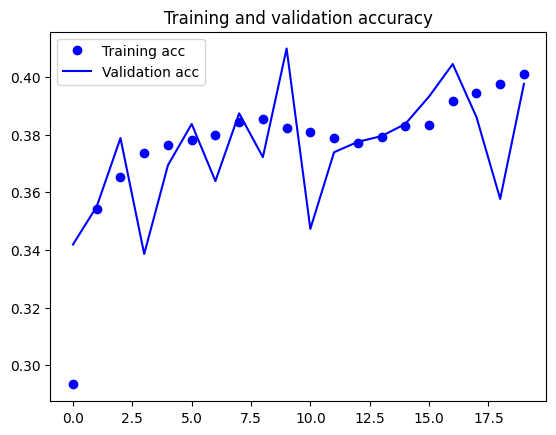

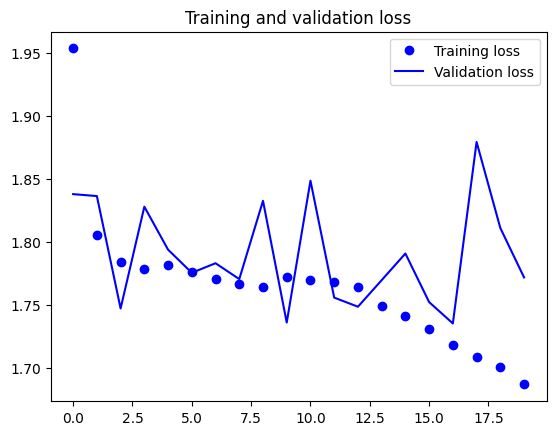

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Test the network on the test data.

In [ ]:
test_loss, test_acc = network.evaluate(test_X, test_y)
final_scores['Simple Neural Network'] = test_acc

313/313 [==============================] - 2s 5ms/step - loss: 1.7371 - accuracy: 0.3933


The next model will utilize convolutional networks to improve the performance. This will model use:
 - a Conv2d layer with a 128 unit size, a (3,3) kernel window and a relu activation function.
 - a MaxPooling2D layer with pool size (2,2)
 - a Conv2d with a 64 unit size, a (3,3) kernel window, and a relu activation function
 - a flatten layer
 -a Dense layer with a 64 unit size and a relu activation function.
 - output layer using activation softmax

 The model will be compiled using the same parameters as the first model.
- optimizer: rmsprop
- metrics: accuracy
- loss: categorical crossentropy

In [ ]:

network = models.Sequential()

network.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32,32,3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Flatten())
network.add(layers.Dense(64, activation="relu"))
network.add(layers.Dense(10, activation='softmax'))


In [ ]:
network.compile(optimizer='rmsprop',
                metrics=['accuracy'],
                loss='categorical_crossentropy')

In [ ]:
history = network.fit(train_X, train_y, epochs=50,  validation_split=0.2, validation_steps=10)

Epoch 1/20
5000/5000 [==============================] - 198s 39ms/step - loss: 1.4655 - accuracy: 0.4812 - val_loss: 1.2095 - val_accuracy: 0.5677
Epoch 2/20
5000/5000 [==============================] - 206s 41ms/step - loss: 1.1676 - accuracy: 0.5990 - val_loss: 1.3231 - val_accuracy: 0.5449
Epoch 3/20
5000/5000 [==============================] - 191s 38ms/step - loss: 1.1226 - accuracy: 0.6219 - val_loss: 1.3419 - val_accuracy: 0.5591
Epoch 4/20
5000/5000 [==============================] - 199s 40ms/step - loss: 1.1440 - accuracy: 0.6233 - val_loss: 1.1398 - val_accuracy: 0.6345
Epoch 5/20
5000/5000 [==============================] - 203s 41ms/step - loss: 1.1634 - accuracy: 0.6221 - val_loss: 1.5575 - val_accuracy: 0.5959
Epoch 6/20
5000/5000 [==============================] - 192s 38ms/step - loss: 1.1885 - accuracy: 0.6151 - val_loss: 1.2712 - val_accuracy: 0.6066
Epoch 7/20
5000/5000 [==============================] - 194s 39ms/step - loss: 1.2074 - accuracy: 0.6111 - val_loss: 1

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = network.evaluate(test_X, test_y)
final_scores['CNN with Max pooling 1'] = test_acc

The next model is constructed using:
- A Conv2D layer with a 32 input size and (3,3) kernel size
- A MaxPooling2D with a (2,2) pool size
- A Conv2d layer with 128 input size and (3,3) kernel size
- A MaxPooling2D layer with a (2,2) pool size
- A Flatten layer
- A Dropout layer with a .5 unit drop rate
- A dense layer with 512 input size and relu activation function
-  An output layer with 10 input size and softmax activation function

The model is compiled with a rmsprop optimizer,categorical crossentropy loss function, and accuracy for metrics. 

In [ ]:

network = models.Sequential()
network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
network.add(layers.MaxPooling2D(2,2))
network.add(layers.Conv2D(128, (3,3)))
network.add(layers.MaxPooling2D(2,2))
network.add(layers.Conv2D(128, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',
                metrics=['accuracy'],
                loss='categorical_crossentropy')

In [ ]:
history = network.fit(train_X, train_y, epochs=10, validation_size=0.2, validation_steps=10)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = network.evaluate(test_X, test_y)


The next model is built using

- VGG16 with input shape (32, 32,3), using imagenet as the weights, and include top set to false.
- A flatten layer
- an output layer with 10 input size and a softmax activation function.

 To prevent the retraining of those layers each layer has its trainable field set to false. The next layer flattens the output from the VGG16 and the output layer


In [1]:
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(input_shape=[32, 32, 3], weights='imagenet', include_top=False)

for layer in vgg_model.layers:
  layer.trainable = False

  flattened_layer = layers.Flatten()(vgg_model.output)
  
  output_layer = layers.Dense(10, activation='softmax')(flattened_layer)

  network = models.Model(inputs=vgg_model.input, outputs=output_layer)

58889256/58889256 [==============================] - 1s 0us/step


NameError: ignored

In [ ]:
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = network.fit(train_X, train_y, epochs=10, steps_per_epoch=len(train_X)/10, validation_split=0.2, validation_steps=10)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = network.evaluate(test_X, test_y)
final_scores['VGG16'] = test_acc
final_scores['VGG16']

Let's take a look at the final scores.

In [ ]:
for score in final_scores:
  print("{}: {}".format(score, final_scores[score]))